In [2]:
import ipyleaflet
# from ipywidgets import HTML
# from shapely.geometry import Polygon
from IPython.display import display

class RendererInterface:

    def build_and_render_map(self):
        map = ipyleaflet.Map(center=self.center_coordinates, zoom=3.5)
        polygon = ipyleaflet.Polygon(
            locations=self.polygon_coordinates,
            color="blue",
            fill_color="blue",
            fill_opacity=0.5
        )
        map.add_layer(polygon)
        display(map)



class BEM_polygon_renderer(RendererInterface):
    def __init__(self):
        super(BEM_polygon_renderer, self).__init__()
        
        # Coordinates for Bab el Mandeb strait
        self.center_coordinates = (12.58, 43.33)
        self.polygon_coordinates = [
            [18.0, 38],
            [16.5, 53.0],
            [14.0, 54],
            [10.0, 60.25],
            [-6.0, 48.75],
            [-1.6667, 41.5667],
        ]


        self.build_and_render_map()
        
a = BEM_polygon_renderer()

Map(center=[12.58, 43.33], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

PnL Statistics:
Total Return: $98.40
Max PnL: $139.56
Min PnL: $-233.69
Volatility (std): $90.29


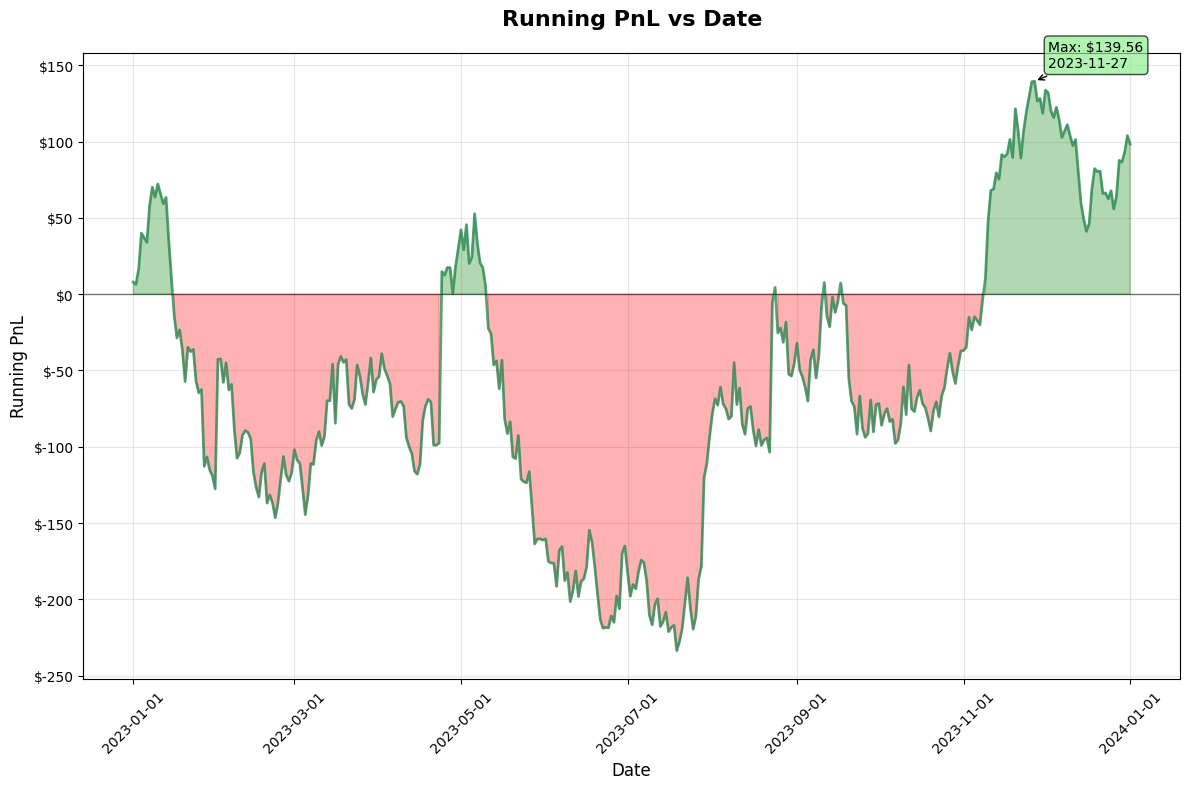

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Set style
plt.style.use('default')
sns.set_palette("husl")

def create_pnl_chart(df, figsize=(12, 8)):
    """
    Create a PnL chart similar to your image
    
    Parameters:
    df: DataFrame with columns 'date' and 'pnl'
    figsize: tuple for figure size
    """
    
    # Ensure date column is datetime
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create the line plot
    ax.plot(df['date'], df['pnl'], linewidth=2, color='#2E8B57', alpha=0.8)
    
    # Fill area under the curve (positive in green, negative in red)
    positive_mask = df['pnl'] >= 0
    negative_mask = df['pnl'] < 0
    
    ax.fill_between(df['date'], df['pnl'], 0, 
                   where=positive_mask, alpha=0.3, color='green', label='Profit')
    ax.fill_between(df['date'], df['pnl'], 0, 
                   where=negative_mask, alpha=0.3, color='red', label='Loss')
    
    # Formatting
    ax.set_title('Running PnL vs Date', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Running PnL', fontsize=12)
    
    # Format y-axis as currency
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.xticks(rotation=45)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    
    # Highlight max/min points
    max_pnl_idx = df['pnl'].idxmax()
    min_pnl_idx = df['pnl'].idxmin()
    
    # Annotate max point
    max_date = df.loc[max_pnl_idx, 'date']
    max_pnl = df.loc[max_pnl_idx, 'pnl']
    ax.annotate(f'Max: ${max_pnl:,.2f}\n{max_date.strftime("%Y-%m-%d")}',
                xy=(max_date, max_pnl),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    # Adjust layout
    plt.tight_layout()
    
    # Show statistics
    print(f"PnL Statistics:")
    print(f"Total Return: ${df['pnl'].iloc[-1]:,.2f}")
    print(f"Max PnL: ${df['pnl'].max():,.2f}")
    print(f"Min PnL: ${df['pnl'].min():,.2f}")
    print(f"Volatility (std): ${df['pnl'].std():,.2f}")
    
    return fig, ax

def create_sample_data():
    """Create sample PnL data similar to your chart"""
    
    # Create date range from 2023-01-01 to 2024-01-01
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2024, 1, 1)
    dates = pd.date_range(start_date, end_date, freq='D')
    
    # Create realistic PnL progression
    np.random.seed(42)  # for reproducibility
    
    # Start at 0, create daily returns
    daily_returns = np.random.normal(0.5, 15, len(dates))  # slight positive drift
    
    # Add some volatility spikes
    volatility_spikes = np.random.choice(len(dates), size=20, replace=False)
    daily_returns[volatility_spikes] *= 3
    
    # Create drawdown period (similar to your chart around mid-2023)
    drawdown_start = len(dates) // 3
    drawdown_end = drawdown_start + 60
    daily_returns[drawdown_start:drawdown_end] -= 5
    
    # Calculate cumulative PnL
    pnl = np.cumsum(daily_returns)
    
    # Create DataFrame
    df = pd.DataFrame({
        'date': dates,
        'pnl': pnl
    })
    
    return df

# Alternative function using seaborn
def create_pnl_chart_seaborn(df, figsize=(12, 8)):
    """
    Create PnL chart using seaborn
    """
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    
    plt.figure(figsize=figsize)
    
    # Create line plot
    sns.lineplot(data=df, x='date', y='pnl', linewidth=2.5)
    
    # Fill areas
    plt.fill_between(df['date'], df['pnl'], 0, 
                    where=(df['pnl'] >= 0), alpha=0.3, color='green')
    plt.fill_between(df['date'], df['pnl'], 0, 
                    where=(df['pnl'] < 0), alpha=0.3, color='red')
    
    plt.title('Running PnL vs Date', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Running PnL')
    
    # Format y-axis
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.tight_layout()

# Example usage:
if __name__ == "__main__":
    # Method 1: Using sample data
    sample_df = create_sample_data()
    fig, ax = create_pnl_chart(sample_df)
    plt.show()
    
    # Method 2: Using your own data
    # Replace this with your actual data loading
    """
    # Load your data (example formats):
    
    # From CSV file:
    df = pd.read_csv('your_pnl_data.csv')
    
    # From lists:
    dates = ['2023-01-01', '2023-01-02', '2023-01-03', ...]
    pnls = [0, 50, 75, ...]
    df = pd.DataFrame({'date': dates, 'pnl': pnls})
    
    # From dictionary:
    data = {
        'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'pnl': [0, 50, 75]
    }
    df = pd.DataFrame(data)
    """
    


PnL Statistics:
Total Return: $98.40
Max PnL: $139.56
Min PnL: $-233.69
Volatility (std): $90.29


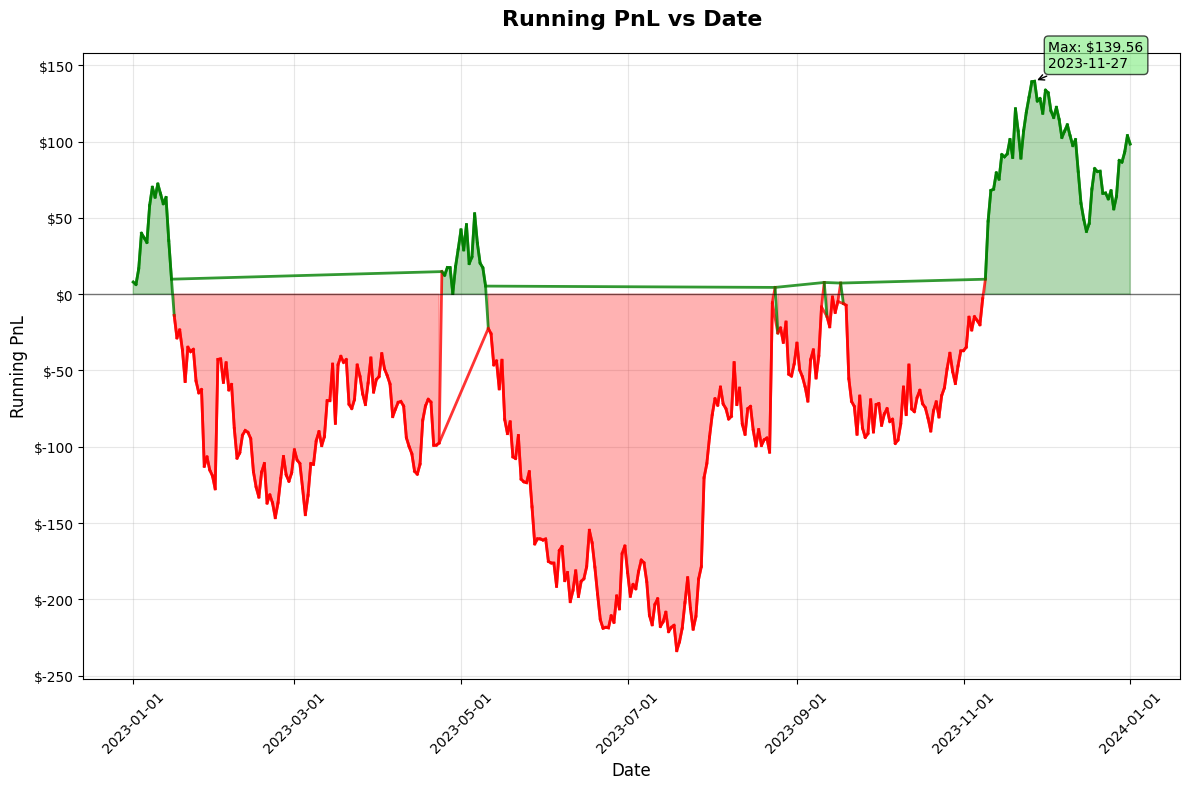

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Set style
plt.style.use('default')
sns.set_palette("husl")

def create_pnl_chart(df, figsize=(12, 8)):
    """
    Create a PnL chart similar to your image
    
    Parameters:
    df: DataFrame with columns 'date' and 'pnl'
    figsize: tuple for figure size
    """
    
    # Ensure date column is datetime
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create the line plot with conditional coloring
    # Split data into positive and negative segments
    positive_mask = df['pnl'] >= 0
    negative_mask = df['pnl'] < 0
    
    # Plot positive segments in green
    if positive_mask.any():
        positive_df = df[positive_mask]
        ax.plot(positive_df['date'], positive_df['pnl'], linewidth=2, color='green', alpha=0.8)
    
    # Plot negative segments in red
    if negative_mask.any():
        negative_df = df[negative_mask]
        ax.plot(negative_df['date'], negative_df['pnl'], linewidth=2, color='red', alpha=0.8)
    
    # For continuous line, we need to handle transitions
    for i in range(len(df) - 1):
        current_val = df['pnl'].iloc[i]
        next_val = df['pnl'].iloc[i + 1]
        current_date = df['date'].iloc[i]
        next_date = df['date'].iloc[i + 1]
        
        # Determine color based on the values
        if current_val >= 0 and next_val >= 0:
            color = 'green'
        elif current_val < 0 and next_val < 0:
            color = 'red'
        else:
            # Transition case - use the color of the starting point
            color = 'green' if current_val >= 0 else 'red'
        
        ax.plot([current_date, next_date], [current_val, next_val], 
                linewidth=2, color=color, alpha=0.8)
    
    # Fill area under the curve (positive in green, negative in red)
    positive_mask = df['pnl'] >= 0
    negative_mask = df['pnl'] < 0
    
    ax.fill_between(df['date'], df['pnl'], 0, 
                   where=positive_mask, alpha=0.3, color='green', label='Profit')
    ax.fill_between(df['date'], df['pnl'], 0, 
                   where=negative_mask, alpha=0.3, color='red', label='Loss')
    
    # Formatting
    ax.set_title('Running PnL vs Date', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Running PnL', fontsize=12)
    
    # Format y-axis as currency
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.xticks(rotation=45)
    
    # Add grid
    ax.grid(True, alpha=0.3)
    ax.set_axisbelow(True)
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    
    # Highlight max/min points
    max_pnl_idx = df['pnl'].idxmax()
    min_pnl_idx = df['pnl'].idxmin()
    
    # Annotate max point
    max_date = df.loc[max_pnl_idx, 'date']
    max_pnl = df.loc[max_pnl_idx, 'pnl']
    ax.annotate(f'Max: ${max_pnl:,.2f}\n{max_date.strftime("%Y-%m-%d")}',
                xy=(max_date, max_pnl),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    # Adjust layout
    plt.tight_layout()
    
    # Show statistics
    print(f"PnL Statistics:")
    print(f"Total Return: ${df['pnl'].iloc[-1]:,.2f}")
    print(f"Max PnL: ${df['pnl'].max():,.2f}")
    print(f"Min PnL: ${df['pnl'].min():,.2f}")
    print(f"Volatility (std): ${df['pnl'].std():,.2f}")
    
    return fig, ax

def create_sample_data():
    """Create sample PnL data similar to your chart"""
    
    # Create date range from 2023-01-01 to 2024-01-01
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2024, 1, 1)
    dates = pd.date_range(start_date, end_date, freq='D')
    
    # Create realistic PnL progression
    np.random.seed(42)  # for reproducibility
    
    # Start at 0, create daily returns
    daily_returns = np.random.normal(0.5, 15, len(dates))  # slight positive drift
    
    # Add some volatility spikes
    volatility_spikes = np.random.choice(len(dates), size=20, replace=False)
    daily_returns[volatility_spikes] *= 3
    
    # Create drawdown period (similar to your chart around mid-2023)
    drawdown_start = len(dates) // 3
    drawdown_end = drawdown_start + 60
    daily_returns[drawdown_start:drawdown_end] -= 5
    
    # Calculate cumulative PnL
    pnl = np.cumsum(daily_returns)
    
    # Create DataFrame
    df = pd.DataFrame({
        'date': dates,
        'pnl': pnl
    })
    
    return df

# Alternative function using seaborn
def create_pnl_chart_seaborn(df, figsize=(12, 8)):
    """
    Create PnL chart using seaborn
    """
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    
    plt.figure(figsize=figsize)
    
    # Create line plot with conditional coloring
    for i in range(len(df) - 1):
        current_val = df['pnl'].iloc[i]
        next_val = df['pnl'].iloc[i + 1]
        current_date = df['date'].iloc[i]
        next_date = df['date'].iloc[i + 1]
        
        # Determine color based on current value
        color = 'green' if current_val >= 0 else 'red'
        
        # Plot line segment
        plt.plot([current_date, next_date], [current_val, next_val], 
                linewidth=2.5, color=color, alpha=0.8)
    
    # Plot the last point
    last_color = 'green' if df['pnl'].iloc[-1] >= 0 else 'red'
    plt.plot(df['date'].iloc[-1], df['pnl'].iloc[-1], 'o', color=last_color, markersize=3)
    
    # Fill areas
    plt.fill_between(df['date'], df['pnl'], 0, 
                    where=(df['pnl'] >= 0), alpha=0.3, color='green')
    plt.fill_between(df['date'], df['pnl'], 0, 
                    where=(df['pnl'] < 0), alpha=0.3, color='red')
    
    plt.title('Running PnL vs Date', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Running PnL')
    
    # Format y-axis
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.tight_layout()

# Example usage:
if __name__ == "__main__":
    # Method 1: Using sample data
    sample_df = create_sample_data()
    fig, ax = create_pnl_chart(sample_df)
    plt.show()
    
    # Method 2: Using your own data
    # Replace this with your actual data loading
    """
    # Load your data (example formats):
    
    # From CSV file:
    df = pd.read_csv('your_pnl_data.csv')
    
    # From lists:
    dates = ['2023-01-01', '2023-01-02', '2023-01-03', ...]
    pnls = [0, 50, 75, ...]
    df = pd.DataFrame({'date': dates, 'pnl': pnls})
    
    # From dictionary:
    data = {
        'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'pnl': [0, 50, 75]
    }
    df = pd.DataFrame(data)
    """
    
    # Create chart with your data:
    # fig, ax = create_pnl_chart(df)
    # plt.show()
    
    # Or using seaborn:
    # create_pnl_chart_seaborn(df)
    # plt.show()

In [2]:
from collections import defaultdict, deque
from threading import Lock, Event
import threading
import time
from datetime import datetime

completion_queue = deque()
new_completion_event = Event()

In [9]:
# completion_queue.popleft()
completion_queue.append({
    "role": "system",
    "content": "You are a helpful assistant that provides code snippets and explanations based on user requests."
})


completion_queue.append({
    "role": "admin",
    "content": "HEY EHYE HEY HEY"
})

In [11]:
completion_queue.popleft()  # This line is commented out to avoid errors in the current context

{'role': 'system',
 'content': 'You are a helpful assistant that provides code snippets and explanations based on user requests.'}

In [1]:
# len(completion_queue)

import queue

a = queue.Queue(maxsize=10)
a.put(("Heloo", "asd"), block=False)
ff, cc = a.get()

In [2]:
ff

'Heloo'

In [5]:
data = {}

# Manual approach - checking each level
if 'level1' not in data:
    data['level1'] = {}
if 'level2' not in data['level1']:
    data['level1']['level2'] = {}

data['level1']['level2']['level3'] = 'my_value'

data

{'level1': {'level2': {'level3': 'my_value'}}}

In [7]:
from collections import defaultdict

# Simple two-level nesting
nested_dict = defaultdict(dict)
nested_dict['level1']['level2'] = 'my_value'
nested_dict

defaultdict(dict, {'level1': {'level2': 'my_value'}})

In [ ]:
import pandas as pd
import os
import requests
import json
from datetime import datetime, date
import vortexasdk as v
import plotly.express as px
import numpy as np
import ipyleaflet
from ipywidgets import HTML
from shapely.geometry import Point, Polygon
import pytz

vessel_data = ['a']
# Coordinates for Bab el Mandeb strait
center_coordinates = (12.58, 43.33)

# Create the map centered around Bab el Mandeb
m = ipyleaflet.Map(center=center_coordinates, zoom=3.5)

# Define the coordinates for the polygon at Bab el Mandeb
polygon_coordinates = [
    [18.0, 38],
    [16.5, 53.0],
    [14.0, 54],
    [10.0, 60.25],
    [-6.0, 48.75],
    [-1.6667, 41.5667],
]

# Create the polygon and add it to the map
polygon = ipyleaflet.Polygon(
    locations=polygon_coordinates,
    color="blue",
    fill_color="blue",
    fill_opacity=0.5
)
m.add_layer(polygon)
polygons = [Polygon(polygon_coordinates)]
display(m)

from datetime import datetime, timedelta
# Define API key
VORTEXA_API_KEY = "" \
""
SIGNAL_API_KEY = "076fdda9-af50-4a5a-bee6-6d2cf4d6732a"

# Extract vessel data
vessel_df = v.Vessels().search(term=vessel_data, exact_term_match=False).to_df()
# Extract the first 16 id characters
vessel_df['id_16'] = vessel_df['id'].apply(lambda x: x[:16])
vessel_df.head()

# Note down larger vessel class
vessel_class = [
    "oil_lr1",
    "oil_mr1",
    "oil_mr2",
    "oil_lr2",
    "oil_lr3",
    "oil_vlcc"
]
vessel_df = vessel_df[vessel_df['imo'] != '']
# ves_id = [str(int(i)) for i in list(vessel_df[vessel_df['vessel_class'].isin(vessel_class)]['imo'].values)]
ves_id = ['1021788', 9379624]

# Define start and end timestamps
end_timestamp = datetime.now() + timedelta(days=1)
start_timestamp = end_timestamp - timedelta(days=2)
interval = '15m'

def extract_vessel_positions(list_of_vessels, start_timestamp, end_timestamp, interval):
    URL = "https://api.vortexa.com/v6/signals/vessel-positions"
    start_timestamp_iso = start_timestamp.isoformat()
    end_timestamp_iso = end_timestamp.isoformat()
    # Make API calls
    PARAMS = {
        'apikey': SIGNAL_API_KEY,
        'time_min': start_timestamp_iso,
        'time_max': end_timestamp_iso,
        'interval': interval,
        'vessel_id': list_of_vessels
    }
    r = requests.get(url=URL, params=PARAMS)
    data = r.json()
    return data


data = []
for i in range(0, len(ves_id), 100):
    temp = extract_vessel_positions(ves_id[i:i+100], start_timestamp, end_timestamp, interval)
    print(f"Extracted {i+100} vessels")
    data.append(temp['data'])



data
def is_point_in_polygons(lon, lat, polygon_coords):
    point = Point(lon, lat)  # Note that Point takes (longitude, latitude)
    return any(Polygon(polygon).contains(point) for polygon in polygon_coords)


# # Concat all the data
# final_data = pd.concat([pd.DataFrame(i) for i in data]).reset_index(drop=True)

# # Apply the function to each row in the DataFrame
# final_data['in_polygon'] = final_data.apply(lambda row: is_point_in_polygons(row['lat'], row['lon'], polygons), axis=1)

# # Get the current date
# now = datetime.now()

# # Calculate the start of the current month
# start_of_current_month = datetime(now.year, now.month, 1)

# # Calculate the start of the previous month
# if now.month == 1:
#     start_of_previous_month = datetime(now.year - 1, 12, 1)
# else:
#     start_of_previous_month = datetime(now.year, now.month - 1, 1)

# if now.month == 12:
#     start_of_next_month = datetime(now.year + 1, 1, 1)
# else:
#     start_of_next_month = datetime(now.year, now.month + 1, 1)

# start_of_current_month_str = start_of_current_month.strftime('%Y-%m-%d')
# start_of_previous_month_str = start_of_previous_month.strftime('%Y-%m-%d')
# start_of_next_month_str = start_of_next_month.strftime('%Y-%m-%d')

# filtered_data = final_data[(final_data['timestamp'] >= start_of_previous_month_str)]

# vessels_in_polygon = filtered_data[filtered_data['in_polygon']]

# vessels_in_polygon["timestamp_of_today"] = now.date()

# def generate_entry_exit_events(group):
#     events = []
#     current_state = None
#     entry_time = None

#     for index, row in group.iterrows():
#         if row['in_polygon'] != current_state:
#             if row['in_polygon']:  # Entry event
#                 entry_time = row['timestamp']
#             else:  # Exit event
#                 if entry_time is not None:
#                     events.append({
#                         'vessel_id': row['vessel_id'],
#                         'entry_timestamp': entry_time,
#                         'exit_timestamp': row['timestamp'],
#                         'lat': row['lat'],
#                         'lon': row['lon']
#                     })
#                 entry_time = None
#             current_state = row['in_polygon']

#     # Handle the case where the last state is 'in_polygon'
#     if current_state and entry_time is not None:
#         events.append({
#             'vessel_id': group.iloc[-1]['vessel_id'],
#             'entry_timestamp': entry_time,
#             'exit_timestamp': None,
#             'lat': group.iloc[-1]['lat'],
#             'lon': group.iloc[-1]['lon']
#         })

#     return events


# # Apply the function to each vessel group
# def signal_to_event(data):
#     grouped = data.groupby("vessel_id")
#     all_events = []

#     for name, group in grouped:
#         all_events.extend(generate_entry_exit_events(group))

#     # Create a DataFrame with the events
#     events_df = pd.DataFrame(all_events)
#     # Merge with vessels data
#     final_df = events_df.merge(
#         vessel_df, left_on="vessel_id", right_on="id_16", how="left"
#     )
#     final_df = final_df.drop(columns=["id_16", "id"])

#     final_df["entry_timestamp"] = pd.to_datetime(final_df["entry_timestamp"])
#     final_df["exit_timestamp"] = pd.to_datetime(final_df["exit_timestamp"])

#     # Get the timezone from the entry_timestamp if available, otherwise default to UTC
#     timezone = final_df["entry_timestamp"].dt.tz

#     # Make current time timezone-aware
#     now = datetime.now(pytz.UTC).astimezone(timezone)

#     # Calculate time spent for vessels with an exit timestamp
#     final_df["time_spent"] = final_df.apply(
#         lambda row: (
#             (row["exit_timestamp"] - row["entry_timestamp"]).total_seconds() / 3600
#             if pd.notnull(row["exit_timestamp"])
#             else (now - row["entry_timestamp"]).total_seconds() / 3600
#         ),
#         axis=1,
#     )

#     return final_df

# filtered_df = signal_to_event(filtered_data)
# filtered_df = filtered_df[filtered_df["exit_timestamp"].isnull()]
# filtered_df


Map(center=[12.58, 43.33], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

Extracted 100 vessels


[[{'vessel_id': '1cfcecd12a948f8b',
   'lat': 14.27266148,
   'lon': 42.04502458,
   'timestamp': '2025-08-03T08:15:00.000Z',
   'heading': 145},
  {'vessel_id': '1cfcecd12a948f8b',
   'lat': 14.24823593,
   'lon': 42.06286989,
   'timestamp': '2025-08-03T08:30:00.000Z',
   'heading': 144},
  {'vessel_id': '1cfcecd12a948f8b',
   'lat': 14.18852904,
   'lon': 42.10775186,
   'timestamp': '2025-08-03T08:45:00.000Z',
   'heading': 144},
  {'vessel_id': '1cfcecd12a948f8b',
   'lat': 14.15053374,
   'lon': 42.13149016,
   'timestamp': '2025-08-03T09:00:00.000Z',
   'heading': 145},
  {'vessel_id': '1cfcecd12a948f8b',
   'lat': 14.10711055,
   'lon': 42.17382363,
   'timestamp': '2025-08-03T09:15:00.000Z',
   'heading': 136},
  {'vessel_id': '1cfcecd12a948f8b',
   'lat': 14.07997105,
   'lon': 42.19678864,
   'timestamp': '2025-08-03T09:30:00.000Z',
   'heading': 143},
  {'vessel_id': '1cfcecd12a948f8b',
   'lat': 14.0501176,
   'lon': 42.21925714,
   'timestamp': '2025-08-03T09:45:00.000Z',

In [7]:
from shapely.geometry import Point, Polygon as shapelyPolygon
import ipyleaflet
from ipywidgets import HTML

Point(12.58, 43.33).x
# polygon_coordinates = [
#     [18.0, 38],
#     [16.5, 53.0],
#     [14.0, 54],
#     [10.0, 60.25],
#     [-6.0, 48.75],
#     [-1.6667, 41.5667],
# ]

# # Create the polygon and add it to the map
# polygon = ipyleaflet.Polygon(
#     locations=polygon_coordinates,
#     color="blue",
#     fill_color="blue",
#     fill_opacity=0.5
# )

12.58

In [ ]:
# v.Vessels().search(term=[], exact_term_match=False).to_df(columns=['name', 'imo', 'mmsi', 'related_names'])

# filtered_df = filtered_df[filtered_df["vessel_class"].isin(vessel_class)]

,name,imo,mmsi,related_names
0,\tATHINEA,9291248.0,622120921,[ATHINEA]
1,\tBORA,9276004.0,657249100,"[BORA, MARE CARIBBEAN]"
2,0051-04,,413358020,[YU SHENG 1]
3,058,,413771781,[]
4,1011,,413762538,[]
...,...,...,...,...
15375,ZUMBI DOS PALMARES,9453810.0,710239000,[]
15376,ZUN YI TAN,9344930.0,413162000,[]
15377,ZUNAIRAH ZARISHA1,9741994.0,405000258,[]
15378,ZY GALAXY,9143221.0,538005967,[BOW OCEANIC]


In [ ]:
# filtered_df
# filtered_df[filtered_df['entry_timestamp'] == filtered_df['entry_timestamp'].max()]

filtered_df
filtered_df[filtered_df['entry_timestamp'] >= f'{(datetime.now() - timedelta(minutes=60))}']

,vessel_id,entry_timestamp,exit_timestamp,lat,lon,name,imo,vessel_class,time_spent


In [8]:
final_data[final_data['in_polygon']==True]

,vessel_id,lat,lon,timestamp,heading,in_polygon
1295,03a6819e6f84fc20,17.762801,39.828898,2025-07-29T18:00:00.000Z,147.7,True
1296,03a6819e6f84fc20,17.749231,39.837275,2025-07-29T18:15:00.000Z,147.7,True
1297,03a6819e6f84fc20,17.684096,39.879782,2025-07-29T18:30:00.000Z,149.0,True
1298,03a6819e6f84fc20,17.646101,39.905536,2025-07-29T18:45:00.000Z,150.0,True
1299,03a6819e6f84fc20,17.629817,39.913321,2025-07-29T19:00:00.000Z,149.6,True
...,...,...,...,...,...,...
92612,fbd923996d68d310,14.701466,53.481513,2025-07-29T09:30:00.000Z,52.0,True
92613,fbd923996d68d310,14.723177,53.509283,2025-07-29T09:45:00.000Z,52.0,True
92614,fbd923996d68d310,14.761172,53.563526,2025-07-29T10:00:00.000Z,53.0,True
92615,fbd923996d68d310,14.777456,53.584380,2025-07-29T10:15:00.000Z,52.0,True


In [39]:
# Just entered BEM

f = final_data[(final_data['in_polygon']==False) &
               (final_data['timestamp'] <= f'{(datetime.now())}') & 
               (final_data['timestamp'] >= f'{(datetime.now() - timedelta(minutes=30))}')]

g = final_data[(final_data['timestamp'] >= f'{(datetime.now())}') & 
               (final_data['timestamp'] <= f'{(datetime.now() + timedelta(minutes=30))}') &
               (final_data['in_polygon']==True)]

f_helper = f.merge(
    vessel_df, left_on="vessel_id", right_on="id_16", how="left"
)
f_helper = f_helper.dropna(subset=['id_16']).drop(columns=["id_16", "id"]).drop_duplicates(subset='imo')
g_helper = g.merge(
    vessel_df, left_on="vessel_id", right_on="id_16", how="left"
)
g_helper = g_helper.dropna(subset=['id_16']).drop(columns=["id_16", "id"]).drop_duplicates(subset='imo')
entering_zone_df = f_helper.merge(g_helper, on='imo', how='inner', suffixes=('_left', '_right'))
entering_zone_df = entering_zone_df[['imo', 'name_left', 'vessel_class_left', 'lat_left', 'lon_left', 'timestamp_right']]


entering_zone_df.rename(
    columns={
        "name_left": "Vessel Name",
        "imo": "IMO",
        "lat_left": "Latitude",
        "lon_left": "Longitude",
        "timestamp_right": "Entry Date",
        "vessel_class_left": "Vessel Type",
    }
)


# g
# helper_df = inter_df.merge(
#     vessel_df, left_on="vessel_id", right_on="id_16", how="left"
# )
# helper_df = helper_df.dropna(subset=['id_16']).drop(columns=["id_16", "id"]).drop_duplicates(subset='imo')
# helper_df

,IMO,Vessel Name,Vessel Type,Latitude,Longitude,Entry Date


In [ ]:
# Just exited BEM

f = final_data[(final_data['in_polygon']==False) &
               (final_data['timestamp'] <= f'{(datetime.now())}') & 
               (final_data['timestamp'] >= f'{(datetime.now() - timedelta(minutes=30))}')]

g = final_data[(final_data['timestamp'] >= f'{(datetime.now())}') & 
               (final_data['timestamp'] <= f'{(datetime.now() + timedelta(minutes=30))}') &
               (final_data['in_polygon']==True)]

f_helper = f.merge(
    vessel_df, left_on="vessel_id", right_on="id_16", how="left"
)
f_helper = f_helper.dropna(subset=['id_16']).drop(columns=["id_16", "id"]).drop_duplicates(subset='imo')
g_helper = g.merge(
    vessel_df, left_on="vessel_id", right_on="id_16", how="left"
)
g_helper = g_helper.dropna(subset=['id_16']).drop(columns=["id_16", "id"]).drop_duplicates(subset='imo')
entering_zone_df = f_helper.merge(g_helper, on='imo', how='inner', suffixes=('_left', '_right'))
entering_zone_df = entering_zone_df[['imo', 'name_left', 'vessel_class_left', 'lat_left', 'lon_left', 'timestamp_right']]


entering_zone_df.rename(
    columns={
        "name_left": "Vessel Name",
        "imo": "IMO",
        "lat_left": "Latitude",
        "lon_left": "Longitude",
        "timestamp_right": "Entry Date",
        "vessel_class_left": "Vessel Type",
    }
)


# g
# helper_df = inter_df.merge(
#     vessel_df, left_on="vessel_id", right_on="id_16", how="left"
# )
# helper_df = helper_df.dropna(subset=['id_16']).drop(columns=["id_16", "id"]).drop_duplicates(subset='imo')
# helper_df

In [4]:


filtered_df = filtered_df.drop(columns=['vessel_id', 'time_spent'])
filtered_df.rename(
    columns={
        "name": "Vessel Name",
        "imo": "IMO",
        "lat": "Latitude",
        "lon": "Longitude",
        "entry_timestamp": "Entry Date",
        "exit_timestamp": "Exit Date",
        "vessel_class": "Vessel Type",
    }
)




,Entry Date,Exit Date,Latitude,Longitude,Vessel Name,IMO,Vessel Type
0,2025-07-26 03:00:00+00:00,NaT,12.997105,48.723345,SIFSAFAH,9856713.0,oil_mr2
1,2025-07-26 03:00:00+00:00,NaT,17.277004,42.337248,ATAHUALPA,9451460.0,oil_mr2
2,2025-07-26 03:00:00+00:00,NaT,16.856342,42.471626,NAVE ORION,9459096.0,oil_mr2
3,2025-07-26 03:00:00+00:00,NaT,15.279537,42.648313,SOFOS,9278064.0,oil_mr2
4,2025-07-27 19:30:00+00:00,NaT,17.201013,40.751585,NCC WAFA,9688348.0,oil_mr2
5,2025-07-26 02:45:00+00:00,NaT,14.421929,53.105527,PS QUEEN,9358319.0,oil_mr2
6,2025-07-26 17:30:00+00:00,NaT,6.263796,54.075312,DALIL,9733806.0,oil_vlcc
7,2025-07-26 03:30:00+00:00,NaT,12.766419,44.916235,UHUD,9254939.0,oil_mr2
8,2025-07-27 22:15:00+00:00,NaT,17.160304,40.870452,JALADI,9384227.0,oil_vlcc
9,2025-07-26 02:45:00+00:00,NaT,13.754297,51.114750,JOROPO,9380087.0,oil_mr2


In [13]:
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_TABLE_ALIGNMENT
import pandas as pd
from PIL import Image
import io
from datetime import datetime

df = filtered_df.copy()
word_doc_path = './reports/vessel_report.docx'

doc = Document()
    
# Add title with date
title = doc.add_heading('11 December 2024', level=1)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Add main heading
main_heading = doc.add_heading('BEM Vessel Alert Report', level=2)
main_heading.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Add some space
doc.add_paragraph()

try:
    with Image.open('./images/map.png') as img:
        # Convert to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Save to temporary buffer
        img_buffer = io.BytesIO()
        img.save(img_buffer, format='png')
        img_buffer.seek(0)
        
        # Add to document
        pic_paragraph = doc.add_paragraph()
        run = pic_paragraph.add_run()
        run.add_picture(img_buffer, width=Inches(6))
        pic_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    # paragraph = doc.add_paragraph()
    # paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    # run = paragraph.add_run()
    # doc.add_picture('./images/my_map.png', width=Inches(6))
    # doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
except Exception as e:
    print(f"Error adding image: {e}")
    doc.add_paragraph("Map image could not be loaded")

# Add space before table description
doc.add_paragraph()

# Add table description
description = doc.add_paragraph("Below is a breakdown of all ATC vessels currently in the polygon in BEM.")
description.alignment = WD_ALIGN_PARAGRAPH.LEFT

# Add some space
doc.add_paragraph()

# Create table with headers
table = doc.add_table(rows=1, cols=len(df.columns))
table.alignment = WD_TABLE_ALIGNMENT.CENTER

# Add headers
header_cells = table.rows[0].cells
for i, column in enumerate(df.columns):
    header_cells[i].text = column
    # Make header bold
    for paragraph in header_cells[i].paragraphs:
        for run in paragraph.runs:
            run.font.bold = True

# Add data rows
for index, row in df.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value) if pd.notna(value) else ""

# Style the table
table.style = 'Table Grid'

# Auto-fit table columns
for row in table.rows:
    for cell in row.cells:
        cell.width = Inches(1.2)

# Save the document
doc.save(word_doc_path)
print(f"Document saved as: {word_doc_path}")


Error adding image: [Errno 2] No such file or directory: './images/map.png'
Document saved as: ./reports/vessel_report.docx


In [19]:
import pandas as pd
import os
import requests
import json
from datetime import datetime, date
import vortexasdk as v
import plotly.express as px
import numpy as np
import ipyleaflet
from ipywidgets import HTML
from shapely.geometry import Point, Polygon
from html2image import Html2Image



# Coordinates for Bab el Mandeb strait
center_coordinates = (12.58, 43.33)

# Create the map centered around Bab el Mandeb
m = ipyleaflet.Map(center=center_coordinates, zoom=3.5)

# Define the coordinates for the polygon at Bab el Mandeb
polygon_coordinates = [
    [18.0, 38],
    [16.5, 53.0],
    [14.0, 54],
    [10.0, 60.25],
    [-6.0, 48.75],
    [-1.6667, 41.5667],
    
]
# Create the polygon and add it to the map
polygon = ipyleaflet.Polygon(
    locations=polygon_coordinates,
    color="blue",
    fill_color="blue",
    fill_opacity=0.5
)
m.add_layer(polygon)
# m.save('./images/output.html', title='My Map')


import imgkit

# Configure options (set path to wkhtmltoimage if not in PATH)
config = imgkit.config(wkhtmltoimage='/usr/local/bin/wkhtmltoimage')  # Adjust path if needed

# Convert HTML file to image
imgkit.from_file(
    './images/output.html',  # Path to HTML file
    './images/output.jpg',     # Output file (supports .jpg, .png)
    config=config
)











# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# from PIL import Image  # For converting to JPG if needed

# # Configure headless Chrome
# chrome_options = Options()
# chrome_options.add_argument("--headless=new")
# chrome_options.add_argument("--window-size=1920,1080")  # Set viewport size

# # Initialize the driver (update path if needed)
# driver = webdriver.Chrome(options=chrome_options)

# # Load local HTML file (use absolute path!)
# html_path = "./images/output.html"  # Replace with your file's path
# driver.get(html_path)

# # Take screenshot and save as PNG
# driver.save_screenshot("./images/output.png")

# # Optional: Convert PNG to JPG
# Image.open("./images/output.png").convert("RGB").save("./images/output.jpg", "JPEG")

# driver.quit()  # Close the browser


# def html_file_to_image_simple(html_file, output_path):
#     hti = Html2Image()
#     hti.screenshot(html_file=html_file, save_as=output_path)

# html_file_to_image_simple('./images/output.html', './images/map.png')

OSError: 
No wkhtmltoimage executable found: "/usr/local/bin/wkhtmltoimage"
If this file exists please check that this process can read it.
Otherwise please install wkhtmltopdf - http://wkhtmltopdf.org

        

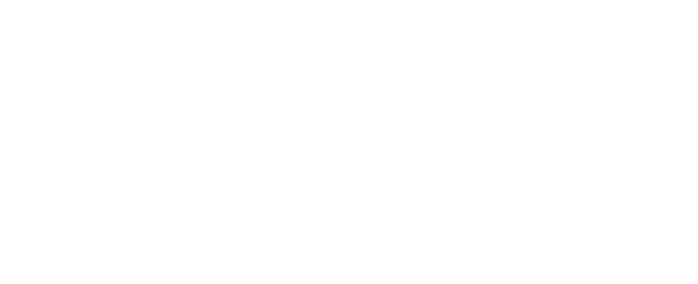

In [4]:
import ipyleaflet
from PIL import Image
import requests
import math

# Save a map view in a PIL image
def toImage(m):

    # Bounds and zoom of the current view
    (latmin,lonmin),(latmax,lonmax) = m.bounds
    zoom = m.zoom

    # URLs of all the Tilelayer on the map
    baseUrls = [x.url for x in m.layers if type(x) == ipyleaflet.leaflet.TileLayer]

    # Opacities
    opacities = [x.opacity for x in m.layers if type(x) == ipyleaflet.leaflet.TileLayer]

    def latlon2tile(lat_deg, lon_deg, zoom):
        lat_rad = (lat_deg * math.pi) / 180.0
        n = math.pow(2,zoom)
        xtile = n * ((lon_deg + 180.0) / 360.0)
        ytile = n * (1 - (math.log(math.tan(lat_rad) + 1.0/math.cos(lat_rad)) / math.pi)) / 2
        return xtile, ytile

    xtile1f,ytile2f = latlon2tile(latmin,lonmin, zoom)
    xtile2f,ytile1f = latlon2tile(latmax,lonmax, zoom)

    xtile1 = int(xtile1f)
    xtile2 = int(xtile2f)
    ytile1 = int(ytile1f)
    ytile2 = int(ytile2f)

    # Amount of pixels to crop on each side
    dx1 = 256*(xtile1f-xtile1)
    dx2 = 256*(xtile2+1-xtile2f)
    dy1 = 256*(ytile1f-ytile1)
    dy2 = 256*(ytile2+1-ytile2f)

    dx1 = round(dx1*100)//100
    dx2 = round(dx2*100)//100
    dy1 = round(dy1*100)//100
    dy2 = round(dy2*100)//100

    # Number of tiles
    nx = xtile2 - xtile1 + 1
    ny = ytile2 - ytile1 + 1

    # Dimension of the overall image
    w = 256 * nx
    h = 256 * ny
    imageTotal = Image.new(mode="RGBA", size=(w,h))

    # Substitute x,y,z into a TileService URL
    def url(baseurl, x,y,zoom):
        return baseurl.replace('{x}',str(int(x))).replace('{y}',str(int(y))).replace('{z}',str(int(zoom)))

    # Cycle on all tiles and compose the overall image
    for x in range(nx):
        xt = xtile1 + x
        xpos = x*256
        for y in range(ny):
            yt = ytile1 + y
            ypos = y*256
            for baseurl,opacity in zip(baseUrls,opacities):
                try:
                    image = Image.open(requests.get(url(baseurl,xt,yt,zoom), stream=True).raw)
                    image = image.convert('RGBA')

                    if opacity < 1.0:
                        # Split image in 4 channels
                        (r,g,b,a) = image.split()

                        a = Image.eval(a, lambda px: opacity*px)


                        # Merge 4 channels
                        image = Image.merge('RGBA',(r,g,b,a))

                    imageTotal.paste(image, (xpos,ypos), mask=image)
                except:
                    pass

    # Crop the image
    area_crop = (dx1, dy1, w-dx2, h-dy2)
    return imageTotal.crop(area_crop)

toImage(m)

In [104]:
class A:
    def __init__(self, func_string):
        self.func_string = func_string

class B:
    def __init__(self, value):
        self.value = value
    
    def get_value(self):
        return self.value
    
    def operate_on_b(self):
        print(f"A is operating on B with value:")

# Dynamically add the method to class A
# setattr(A, 'operate_on_b', exec('operate_on_b'))

# Usage
a = A("operate_on_b()")
b = B(42)
# result = a.operate_on_b(b)
# print(result)


exec(a.func_string)

NameError: name 'operate_on_b' is not defined

In [19]:
d = {1:2, 3:4}
a = next(iter(d.keys()))
d.pop(a)

2

In [20]:
d

{3: 4}